# Practical 27

# Demonstrate Hierarchical Clustering on Credit Card dataset

In [1]:
#Step 1: Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [2]:
data = pd.read_csv
# Step 2 : Loading and cleaning the data
df = pd.read_csv(r"D:\Machine Learning\Credit_Card.csv")
# Dropping the CUST_ID column from the data
df = df.drop("CUST_ID", axis = 1)
# handling the missing values
# Dataframe.fillna(value = None, method, inplace): fill NA/NaN values
# parameters:
# 1. value: scalar, dict, Series, or DataFrame
# 2. method: {"backfill", "bfill", "pad", "ffill", "None"}
#    ffill: propagate last valid observation forward to next valid
#    bfill: use next valid observation to fill gap
# 3. inplace: bool, default false. If True, fill in-place
df.fillna(method = "ffill", inplace = True)
print(df.shape)
df.head()

(8950, 17)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
# step 3 : preprocessing the Data
# scalling the data so that all the features become comparable
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
# Normalizing the data so that the data approximately follows a  Gaussian distribution
df_normalized = normalize(df_scaled)
# converting the numpy array into a pandas DataFrame
df_normalized = pd.DataFrame(df_normalized)

In [4]:
# step 4 : reducing the dimensionality of the Data
pca = PCA(n_components = 2)
df_principal = pca.fit_transform(df_normalized)
df_principal = pd.DataFrame(df_principal)
df_principal.columns = ["P1", "P2"]
df_principal.shape

(8950, 2)

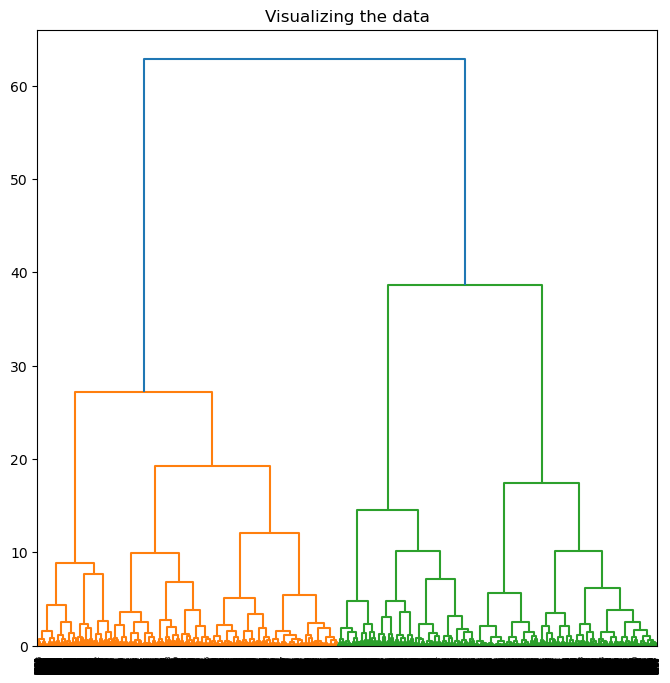

In [5]:
# dendograms are used to divide a given cluster into many difffernt 
# ward method is actully method that tries to minimize the variables
plt.figure(figsize = (8,8))
plt.title("Visualizing the data")
Dendrogram = shc.dendrogram((shc.linkage(df_principal, method = "ward")))

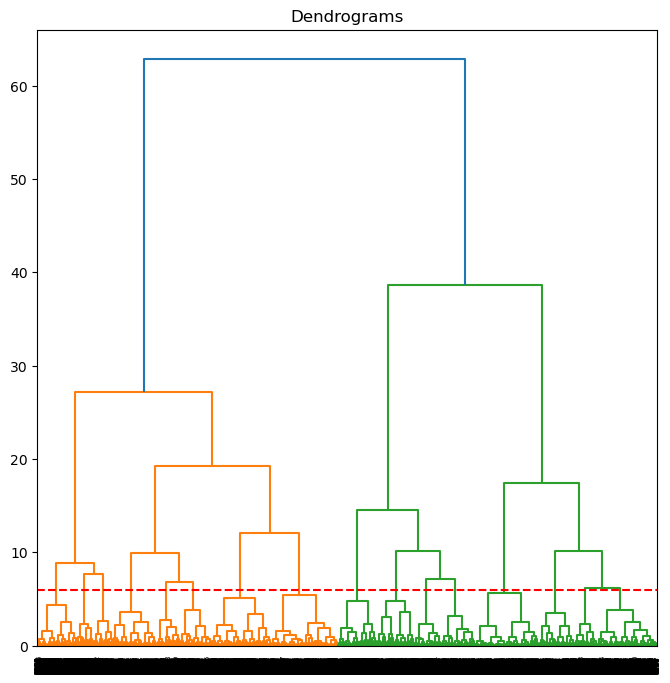

In [6]:
plt.figure(figsize = (8,8))
plt.title("Dendrograms")
# syntax: dendrograms(linked, orientation = "top", labels = labellist, distance)
# ward method is actully method that tries to minimize the variables
dend = shc.dendrogram(shc.linkage(df_principal, method = "ward"))
plt.axhline(y = 6, color = "r", linestyle = "--")

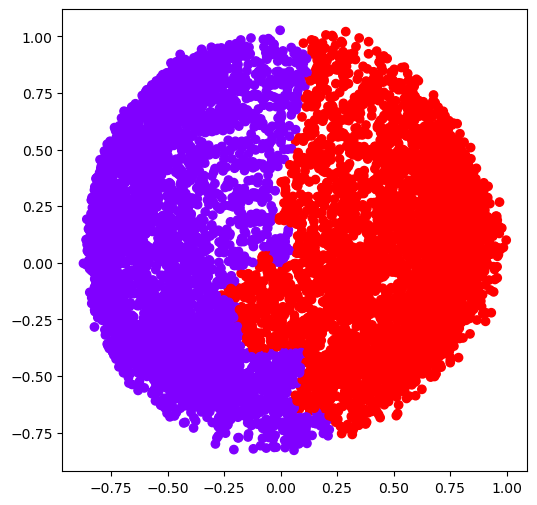

In [7]:
ac2 = AgglomerativeClustering(n_clusters = 2)
# visualizing the clustering
plt.figure(figsize = (6, 6))
plt.scatter(df_principal["P1"], df_principal["P2"], c = ac2.fit_predict(df_principal), cmap = "rainbow")
plt.show()